In [8]:
 import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
num_samples = 1000

# Generate random values for square footage, bedrooms, and bathrooms
square_footage = np.random.randint(800, 3500, size=num_samples)
bedrooms = np.random.randint(1, 6, size=num_samples)
bathrooms = np.random.uniform(1, 4, size=num_samples)

# Generate prices based on the equation: price = 100 * square_footage + 20000 * bedrooms + 15000 * bathrooms + random_noise
random_noise = np.random.normal(0, 20000, size=num_samples)  # Random noise with normal distribution
prices = 100 * square_footage + 20000 * bedrooms + 15000 * bathrooms + random_noise

In [11]:
 # Create a DataFrame to store the data
data = pd.DataFrame({
    'Square Footage': square_footage,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': prices
})

# Save the dataset to a CSV file
data.to_csv('house.csv', index=False)


In [10]:

# Display the first few rows of the dataset
print(data.head())

   Square Footage  Bedrooms  Bathrooms          Price
0            1660         5   3.519584  318817.868136
1            2094         5   3.700069  348559.267932
2            1930         5   2.060264  337088.875437
3            1895         4   1.710612  313910.577906
4            2438         4   3.341577  341772.450899


In [12]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
     

In [13]:

# Load the dataset
data = pd.read_csv('house.csv')

In [14]:
data

,Square Footage,Bedrooms,Bathrooms,Price
0,1660,5,3.519584,318817.868136
1,2094,5,3.700069,348559.267932
2,1930,5,2.060264,337088.875437
3,1895,4,1.710612,313910.577906
4,2438,4,3.341577,341772.450899
...,...,...,...,...
995,1614,2,3.843064,241838.260953
996,3075,1,1.216949,337482.130718
997,2700,2,3.865346,405733.937475
998,3063,2,2.567730,395947.009461


In [15]:

# Separate features and target variable
X = data[['Square Footage', 'Bedrooms', 'Bathrooms']]
y = data['Price']

In [16]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,Square Footage,Bedrooms,Bathrooms
29,1775,4,2.212956
535,2038,1,2.569989
695,1570,1,3.487860
557,2165,2,1.456313
836,2105,3,3.670291
...,...,...,...
106,1579,5,3.976474
270,1137,5,3.396143
860,2046,2,1.092867
435,3279,5,1.406062


In [18]:
X_test

,Square Footage,Bedrooms,Bathrooms
521,2190,1,3.316037
737,842,2,1.022992
740,1560,4,1.324077
660,1488,2,3.618262
411,1312,2,1.078590
...,...,...,...
408,2464,2,1.553429
332,3413,5,1.297534
208,2730,1,3.212071
613,1966,3,1.208923


In [19]:
y_train

29     345887.545343
535    237179.735190
695    251137.514473
557    283452.367858
836    355093.055106
           ...      
106    318365.494175
270    278229.604284
860    244221.294622
435    476620.015276
102    384254.375486
Name: Price, Length: 800, dtype: float64

In [20]:
y_test

521    300877.573298
737    150707.671760
740    260687.597634
660    260037.407034
411    194190.636212
           ...      
408    330054.660728
332    460904.277654
208    331780.225527
613    303850.298110
78     348358.479222
Name: Price, Length: 200, dtype: float64

In [21]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [23]:
y_pred

array([290673.40876562, 137315.1413564 , 253600.44242787, 246154.72998732,
       184908.71663633, 421962.05405548, 239939.59371385, 178880.45622546,
       245880.78230613, 265118.74588009, 261135.65928412, 307394.31272796,
       270026.39212753, 338920.61155609, 332839.39060887, 386092.39088263,
       341077.96168768, 254055.5663568 , 480897.00277506, 219172.52251676,
       340223.06340065, 361695.06143786, 390298.53238465, 457918.63240838,
       252371.90134998, 369915.29766502, 401837.48476999, 244116.32190607,
       232590.68252215, 410122.26935281, 358852.21431649, 237197.39777842,
       176250.19068737, 384841.37079778, 364039.64236348, 384940.29627431,
       346277.9814343 , 423542.17518164, 262857.33665013, 338782.4469378 ,
       185687.59008018, 365544.10191103, 387979.85403014, 295948.88593921,
       231799.12288347, 307348.99448067, 234543.37087995, 232321.46149463,
       286425.24780657, 325372.40308019, 288961.9787155 , 370632.08369369,
       142798.65287698, 3

In [24]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 357321032.8104223


In [25]:
example_house = [[1800, 3, 2]]
predicted_price = model.predict(example_house)
print("Predicted Price:", predicted_price[0])

Predicted Price: 269140.5768620823


C:\Users\ABHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


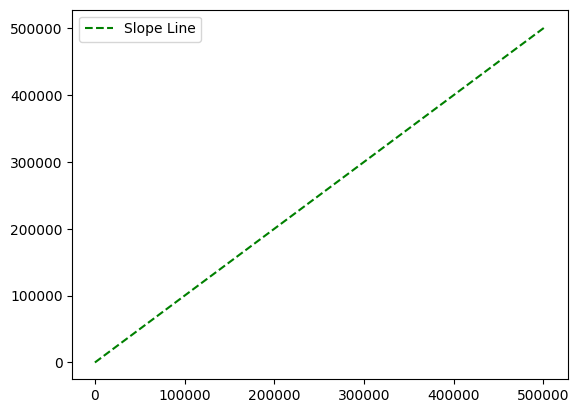

In [31]:
# Plot the slope line
max_price = max(y_test.max(), y_pred.max())
plt.plot([0, max_price], [0, max_price], color='green', linestyle='--')  # Slope line
plt.legend(['Slope Line', 'Predictions'])
plt.show()

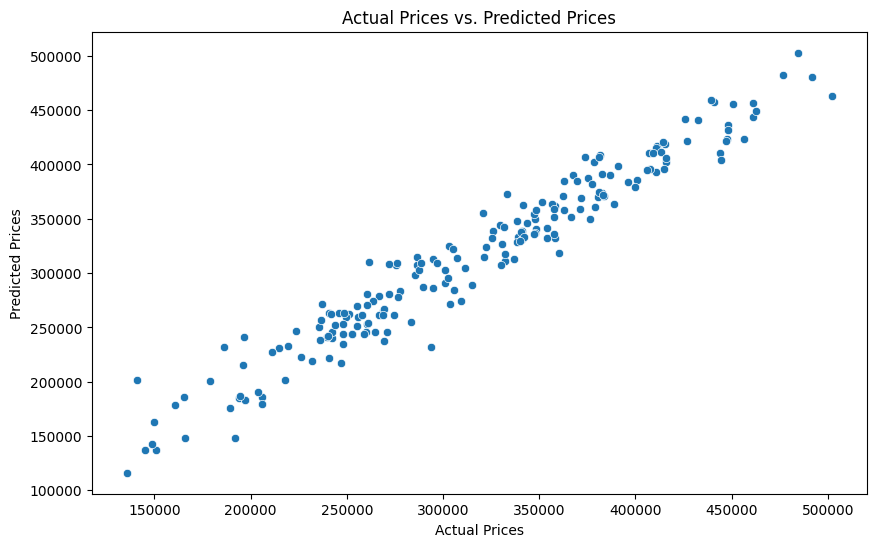

In [32]:

# Visualize actual vs. predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()